Notes taken from various online sources, as mentioned below.

https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

- Primary goal of information theory is to quantify how much information is in data.

- Most important metric: entropy.

- Defn of entropy for a probability distribution:
    - $H = -\sum_{i=1}^{N} p(x_{i}) \log{ p(x_{i})}$
    
    - If we use $\log_{2}$ in the calculation, we can interpret entropy as the minimum number of bits it would take to encode our information.

- But entropy doesn't tell us the optimal encoding scheme to help us achieve this compression.

- By simply knowing the theoretical lower bound on the number of bits we need, we have a way to quantify exactly how much information is in our data. Next, we want to quatify how much information is lost when we substitute our observed distribution for a parametrized approximation.

- KL divergence is a slight modification of the entropy formula.

- Let our probability distribution be $p$, and our approximating probability distribution be $q$.

- $$D_{KL}(p||q) = \sum_{i=1}^{N} p(x_{i}) [\log{ p(x_{i})} - \log{ q(x_{i})}] = \sum_{i=1}^{N} p(x_{i}) \log{ \frac{p(x_{i})}{q(x_{i})}}$$
    - The KL divergence gives the expectation of the log difference between the prob of data in the original distr with the approximating distr.
    
    - If we think in terms of $\log_{2}$, we can interpret this as how many bits of information we expect to lose by using the approximate prob distr.

- It may be tempting to think of KL divergence as a distance metric, however we cannot use KL divergence to measure the _distance_ between two distributions.
    - Why?
    
    - Because KL divergence is _not symmetric_. This means $D_{KL}(p||q) \neq D_{KL}(q||p)$.

https://machinelearningmastery.com/divergence-between-probability-distributions/

### Statistical Distance

- There are many situations where we may want to compare 2 prob distr.

- For example, suppose we have a random variable, for which we may have a true distribution and an approximation of that distribution.

- Now we want to quantify the difference between these two distributions.

- This is done by calculating the statistical distance between the two statistical objects (here, these objects are probability distributions).

- But instead, it is more common to calculate a divergence between two probability distributions.
    - Divergence is not a symmetrical measure. This means divergence of distr Q from P is different than divergence of distr P from Q.

### Kullback-Leibler Divergence

- When the prob for an event from $P$ is large, but prob for the same event in $Q$ is small, then KL divergence is large.

- When the prob for an event from $P$ is small, but prob for the same event in $Q$ is large, then KL divergence is large here also, but not as large as in the first case.

- <font color=red>Check this^! How to check this?</font>

- When KL=0, that means both distributions are identical.

- KL divergence score is not symmetrical. This means:

$$D_{KL}(P|Q) \neq D_{KL}(Q|P)$$

- Named after Solomon Kullback and Richard Leibler.

- If we are attempting to approximate an unknown probablity distribution, then the target probability distribution from data is P, and Q is our approximation of the distribution.

- KL divergence summarizes the number of additional bits/info required to represent an event from the random variable. The better our approximation, the less additional info is required.

Consider the following example:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import kl_div, rel_entr

In [2]:
# define distributions:
events = ["red", "green", "blue"]
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

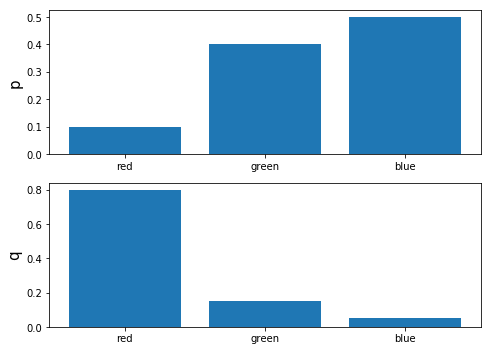

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 0.5])
ax2 = fig.add_axes([0, -0.6, 1, 0.5])

ax1.bar(events, p)
ax2.bar(events, q)

ax1.set_ylabel("p", fontsize=15)
ax2.set_ylabel("q", fontsize=15)

plt.show()

In [4]:
def KL_divergence_bits(p, q):
    MySum = 0.0
    for ii in range(len(p)):
        MySum += p[ii] * np.log2(p[ii]/q[ii])
    return MySum

In [5]:
def KL_divergence_nats(p, q):
    MySum = 0.0
    for ii in range(len(p)):
        MySum += p[ii] * np.log(p[ii]/q[ii])
    return MySum

In [6]:
# KL(P||Q):
print("KL(P||Q) =", KL_divergence_bits(p, q), "bits")

# KL(Q||P):
print("KL(Q||P) =", KL_divergence_bits(q, p), "bits")

KL(P||Q) = 1.9269790471552186 bits
KL(Q||P) = 2.0216479703638055 bits


In [7]:
# KL(P||Q):
print("KL(P||Q) =", KL_divergence_nats(p, q), "nats")

# KL(Q||P):
print("KL(Q||P) =", KL_divergence_nats(q, p), "nats")

KL(P||Q) = 1.3356800935337299 nats
KL(Q||P) = 1.4012995907424075 nats


Scipy has in-built functions ```kl_div()``` and ```rel_entr()```.

$ \textrm{kl_div}(p, q)
=
\begin{cases} 
    p \log(p/q) - p + q & \text{if } p>0, q>0 \\
    q & \text{if } p = 0, q \geq 0 \\
    \infty & \text{otherwise}
\end{cases}
$

$ \textrm{rel_entr}(p, q)
=
\begin{cases} 
    p \log(p/q) & \text{if } p>0, q>0 \\
    0 & \text{if } p = 0, q \geq 0 \\
    \infty & \text{otherwise}
\end{cases}
$

In [8]:
print( sum(kl_div(p, q)) )
print( sum(kl_div(q, p)) )

1.33568009353373
1.4012995907424075


In [9]:
print( sum(rel_entr(p, q)) )
print( sum(rel_entr(q, p)) )

1.3356800935337299
1.4012995907424075


Note how we have to sum over the outputs of ```kl_div()``` and ```rel_entr()``` in order to get a scalar quantity. This is because of the way these functions have been defined in scipy.

Also note that both ```kl_div()``` and ```rel_entr()``` use natural log in their calculations.

Note that relative "relative entropy" is often used as a synonym for "KL divergence". (See https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

But, clearly, that is not the case in scipy.

### Jensen-Shannon Divergence

- JSD is another way to quantify the difference or similarity between 2 probability distributions.


- It uses the KL divergence to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as divergence of Q from P:<br>
$\textrm{JSD}(P||Q) = \textrm{JSD}(Q||P)$

Defn:
$$\textrm{JSD}(P||Q) = \frac{1}{2} D_{KL}(P||M) + \frac{1}{2} D_{KL}(Q||M)$$

where,
$$M = \frac{1}{2} (P + Q)$$

- JSD provides a smoothed and normalized version of KL divergence.

- JSD $\in [0, \ln{2}]$ (when using natural log in calculation).

- When the two probability distributions are identical, then JSD $= 0$.

- When the two probability distributions are maximally different, then JSD $= \ln{2}$.

- Defn: $\sqrt{\textrm{JSD}}$ = Jensen-Shannon distance.

In [10]:
def JSD_bits(P, Q):
    #assume P and Q are lists.
    M = 0.5 * (np.array(P) + np.array(Q))
    jsd_score = 0.5*KL_divergence_bits(P, M) + 0.5*KL_divergence_bits(Q, M)
    return jsd_score

In [11]:
def JSD_nats(P, Q):
    #assume P and Q are lists.
    M = 0.5 * (np.array(P) + np.array(Q))
    jsd_score = 0.5*sum(rel_entr(P, M)) + 0.5*sum(rel_entr(Q, M))
    return jsd_score

In [12]:
print("JS divergence:")
print("JSD(P||Q) = {} bits".format(JSD_bits(p, q)))
print("JSD(Q||P) = {} bits".format(JSD_bits(p, q)))
print("or,")
print("JSD(P||Q) = {} nats".format(JSD_nats(p, q)))
print("JSD(Q||P) = {} nats".format(JSD_nats(p, q)))

JS divergence:
JSD(P||Q) = 0.42020057037637326 bits
JSD(Q||P) = 0.42020057037637326 bits
or,
JSD(P||Q) = 0.29126084062606405 nats
JSD(Q||P) = 0.29126084062606405 nats


In [13]:
print("JS distance:")
print("JS(P||Q) distance = {} bits".format(np.sqrt(JSD_bits(p, q))) )
print("JS(Q||P) distance = {} bits".format(np.sqrt(JSD_bits(p, q))) )
print("or,")
print("JS(P||Q) distance = {} nats".format(np.sqrt(JSD_nats(p, q))) )
print("JS(Q||P) distance = {} nats".format(np.sqrt(JSD_nats(p, q))) )

JS distance:
JS(P||Q) distance = 0.6482287947757128 bits
JS(Q||P) distance = 0.6482287947757128 bits
or,
JS(P||Q) distance = 0.5396858721757167 nats
JS(Q||P) distance = 0.5396858721757167 nats


JS distance is also given in ```scipy.spatial.distance.jensenshannon```.

In [14]:
from scipy.spatial.distance import jensenshannon

In [15]:
print( "JS distance = {} bits".format(jensenshannon(p, q, 2)) )
print( "JS distance = {} nats".format(jensenshannon(p, q)) )

JS distance = 0.6482287947757129 bits
JS distance = 0.5396858721757167 nats
